In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [49]:
def plot_distribution(counter, title):
    sorted_set = sorted(counter.items(), key=lambda x: x[1], reverse=True)[:40]
    x,y = zip(*sorted_set)
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.barh(x,y)
    plt.xticks(rotation=90)
    plt.xlabel("Ratio to Total Labels")
    plt.ylabel("Aspect")
    plt.show()

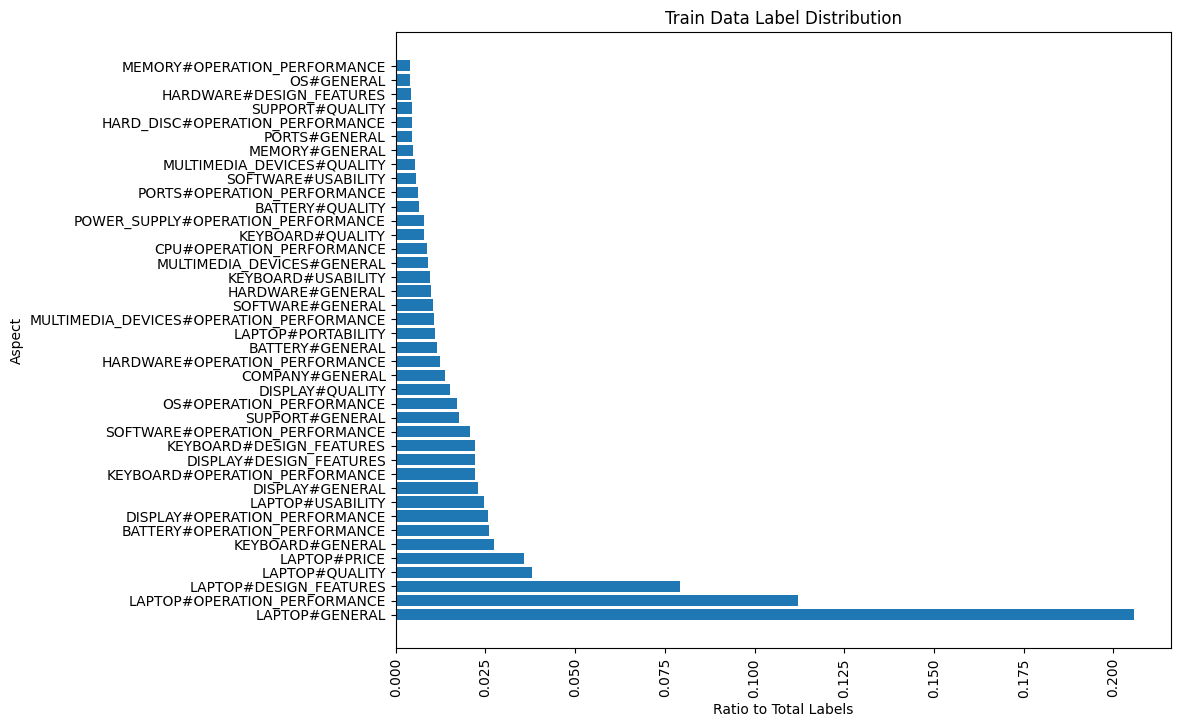

In [71]:
test = pd.read_json(path_or_buf=r"laptop_quad_test.tsv.jsonl", lines=True)
train = pd.read_json(path_or_buf=r"laptop_quad_train.tsv.jsonl", lines=True)


def extract_usable_data(text):
    label = text['category']

    return label
    if 'LAPTOP' in label:
        return label[label.index('#')+1:]
    else:
        return label[:label.index('#')]
    return x

def distribution_calc(jsonobj):
    distribution = {}
    for i in range(len(jsonobj)):
        for j in jsonobj.iloc[i]['labels']:
            extracted_aspect = extract_usable_data(j)
            if extracted_aspect not in distribution:
                distribution[extracted_aspect] = 0
            distribution[extracted_aspect] += 1
    return distribution

train_distribution = distribution_calc(train)
test_distribution = distribution_calc(test)
total_count = sum(train_distribution.values())
for key in train_distribution:
    train_distribution[key] = train_distribution[key] / total_count

labels = []
for key, value in train_distribution.items():
    labels.append(key)

plot_distribution(train_distribution, "Train Data Label Distribution")

In [51]:
len(labels)

114

In [52]:
labelled_list = [1,2,3,4,5,8,9]
labelled_submission = None
for i in labelled_list:
    new_labelled_submission = pd.read_excel(f'data_annotation_{i}.xlsx', sheet_name='submission')
    if labelled_submission is None:
        labelled_submission = new_labelled_submission
    else:
        labelled_submission = pd.concat([labelled_submission, new_labelled_submission], ignore_index=True)

labelled_comments = None
for i in labelled_list:
    new_labelled_comments = pd.read_excel(f'data_annotation_{i}.xlsx', sheet_name='comments')
    if labelled_comments is None:
        labelled_comments = new_labelled_comments
    else:
        labelled_comments = pd.concat([labelled_comments, new_labelled_comments], ignore_index=True)



predicted_comments = pd.read_csv('comment_with_aspect_list.csv')
predicted_submission = pd.read_csv('susbmission_with_aspect_list.csv')

In [53]:
def label_conversion(label):
    return label
    if 'LAPTOP' in label:
        return label[label.index('#')+1:]
    else:
        return label[:label.index('#')]
    
def convert_label_list(label_list):
    return [label_conversion(label) for label in label_list if '#' in label]

In [54]:
def convert_label(input):
    converted_list_annotate = []
    for i in range(len(input)):
        aspects = input[i].split() if type(input[i]) == str else []
        converted_list_annotate.append(convert_label_list(aspects))
    return converted_list_annotate

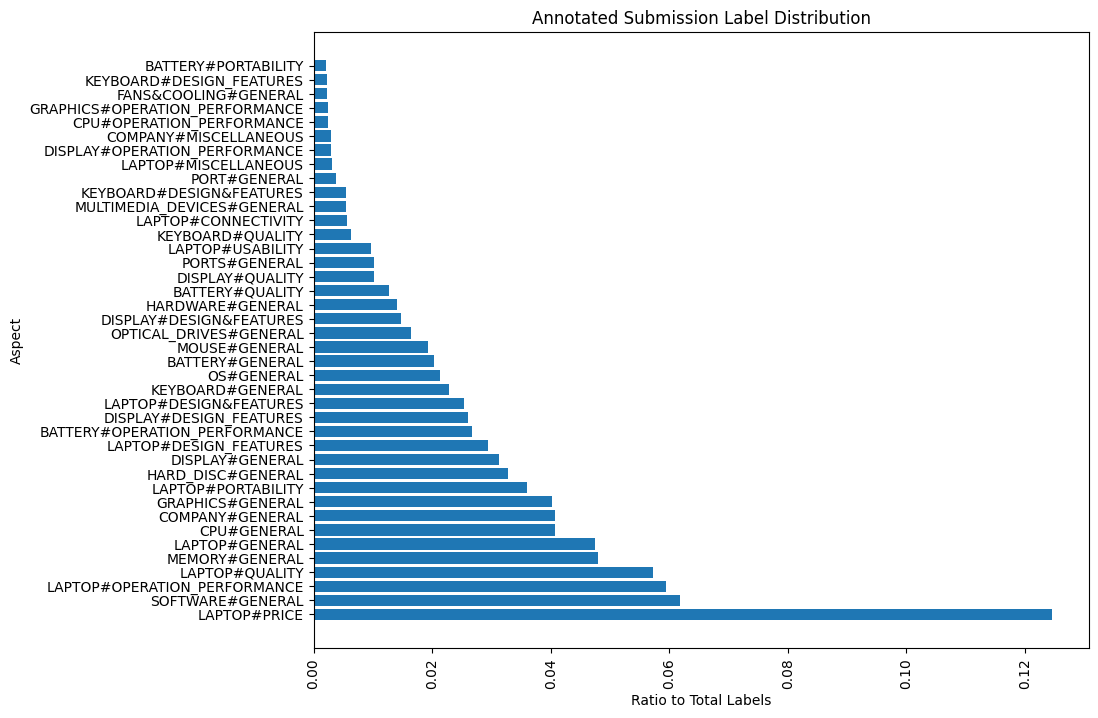

In [70]:
labelled_submission_aspects = labelled_submission['aspects'].to_list()
labelled_submission['aspects_converted'] = convert_label(labelled_submission_aspects)
counter = {}
for label in labelled_submission['aspects_converted'].to_list():
    for aspect in label:
        if aspect in counter:
            counter[aspect] += 1
        else:
            counter[aspect] = 1
total = sum(counter.values())
for key in counter:
    counter[key] = counter[key] / total

plot_distribution(counter, "Annotated Submission Label Distribution")

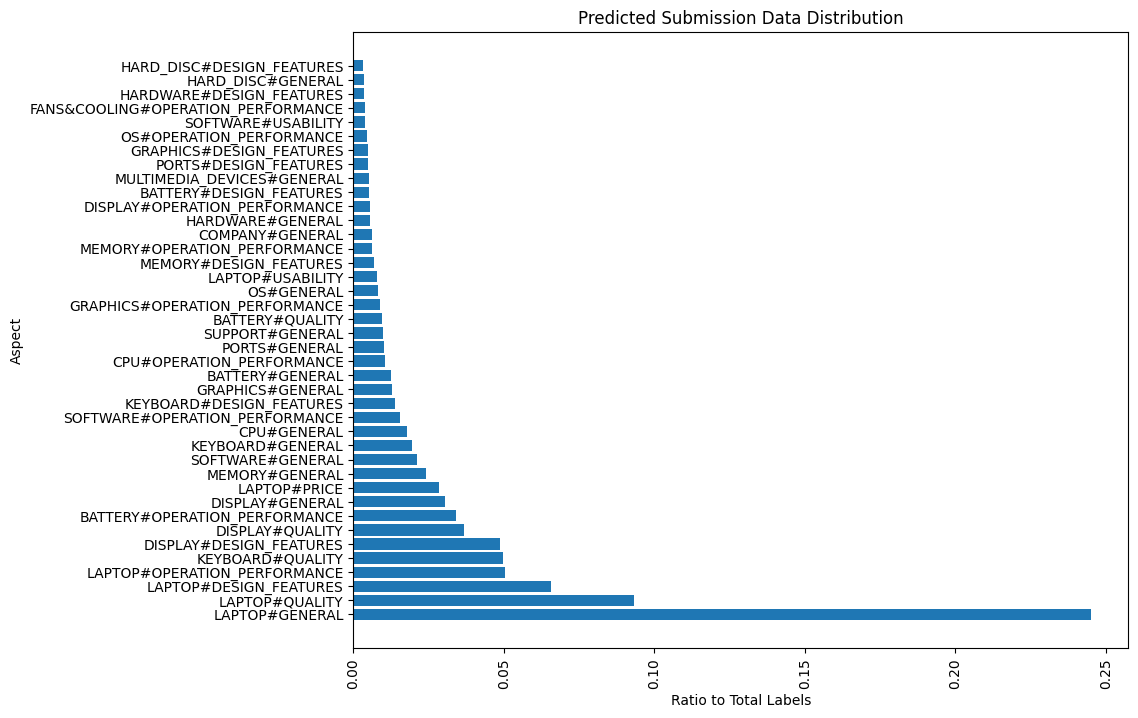

In [56]:
predicted_aspects = predicted_submission['aspects'].tolist()
converted_list_predict = []
for i in range(len(predicted_aspects)):
    aspects = ast.literal_eval(predicted_aspects[i])
    converted_list_predict.append(convert_label_list(aspects))
    

predicted_submission['aspects_converted'] = converted_list_predict
counter = {}
for label in predicted_submission['aspects_converted'].to_list():
    for aspect in label:
        if aspect in counter:
            counter[aspect] += 1
        else:
            counter[aspect] = 1
total = sum(counter.values())
for key in counter:
    counter[key] = counter[key] / total

plot_distribution(counter, "Predicted Submission Data Label Distribution")

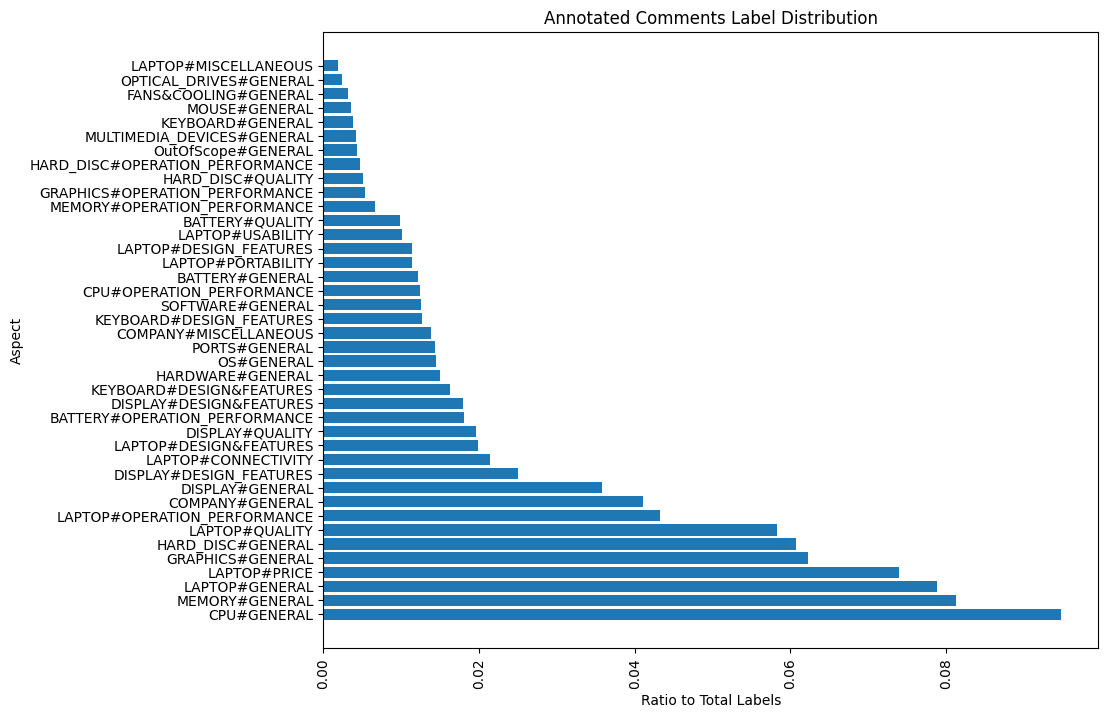

In [72]:
labelled_comments_aspects = labelled_comments['aspects'].to_list()
labelled_comments['aspects_converted'] = convert_label(labelled_comments_aspects)
counter = {}
for label in labelled_comments['aspects_converted'].to_list():
    for aspect in label:
        if aspect in counter:
            counter[aspect] += 1
        else:
            counter[aspect] = 1
total = sum(counter.values())
for key in counter:
    counter[key] = counter[key] / total

plot_distribution(counter, "Annotated Comments Label Distribution")

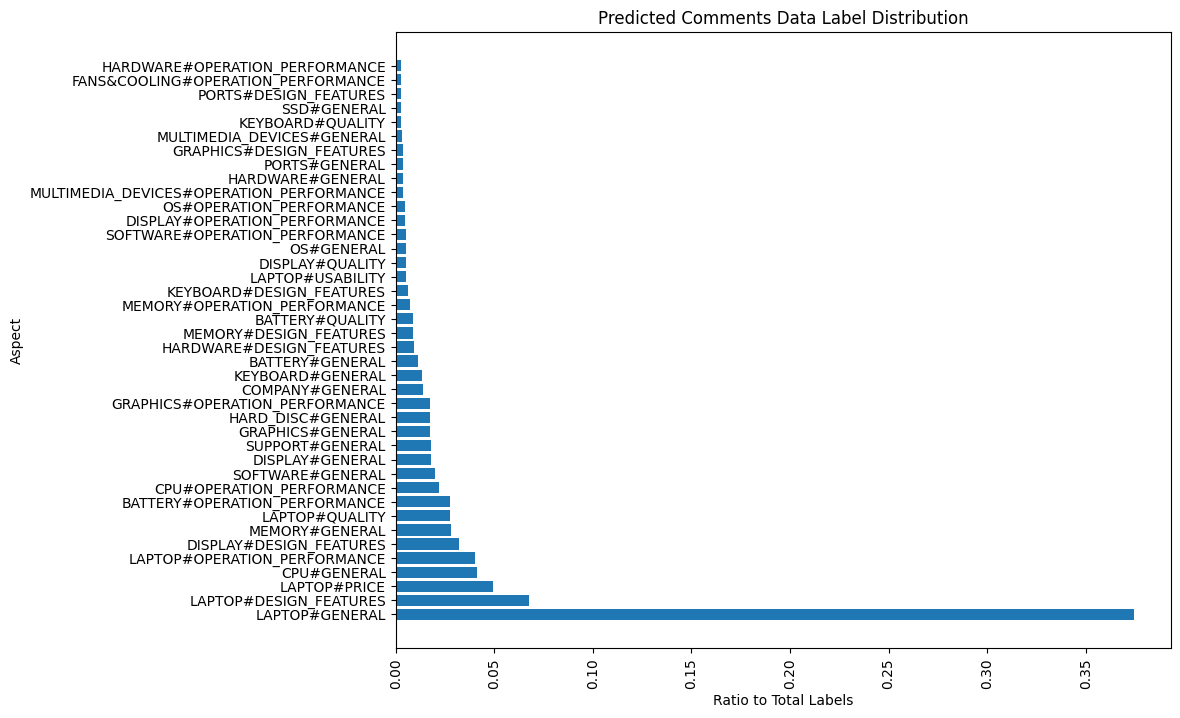

In [58]:
predicted_aspects = predicted_comments['aspects'].tolist()
converted_list_predict = []
for i in range(len(predicted_aspects)):
    if type(predicted_aspects[i]) != str:
        converted_list_predict.append([])
        continue
    aspects = ast.literal_eval(predicted_aspects[i])
    converted_list_predict.append(convert_label_list(aspects))
    

predicted_comments['aspects_converted'] = converted_list_predict
counter = {}
for label in predicted_comments['aspects_converted'].to_list():
    for aspect in label:
        if aspect in counter:
            counter[aspect] += 1
        else:
            counter[aspect] = 1
total = sum(counter.values())
for key in counter:
    counter[key] = counter[key] / total

plot_distribution(counter, "Predicted Comments Data Label Distribution")

In [59]:
import statistics
length_annotated = [len(i) for i in labelled_submission['aspects_converted']]
print("Average number of aspects annotated in submission: ", statistics.mean(length_annotated))
print("Quartile of the aspects annotated: ", statistics.quantiles(length_annotated, n=4))
print("------------------------------")
length_predicted = [len(i) for i in predicted_submission['aspects_converted']]
print("Average number of aspects predicted in submission: ", statistics.mean(length_predicted))
print("Quartile of the aspects predicted: ", statistics.quantiles(length_predicted, n=4))
print("------------------------------")
length_annotated = [len(i) for i in labelled_comments['aspects_converted']]
print("Average number of aspects annotated in comments: ", statistics.mean(length_annotated))
print("Quartile of the aspects annotated: ", statistics.quantiles(length_annotated, n=4))
print("------------------------------")
length_predicted = [len(i) for i in predicted_comments['aspects_converted']]
print("Average number of aspects predicted in comments: ", statistics.mean(length_predicted))
print("Quartile of the aspects predicted: ", statistics.quantiles(length_predicted, n=4))

# average number of annotation > average number of prediction


Average number of aspects annotated in submission:  6.311428571428571
Quartile of the aspects annotated:  [3.0, 5.0, 9.0]
------------------------------
Average number of aspects predicted in submission:  3.155423923614181
Quartile of the aspects predicted:  [1.0, 2.0, 4.0]
------------------------------
Average number of aspects annotated in comments:  4.6705308114704085
Quartile of the aspects annotated:  [1.0, 3.0, 8.0]
------------------------------
Average number of aspects predicted in comments:  1.676569604756908
Quartile of the aspects predicted:  [1.0, 1.0, 2.0]


In [60]:
def process_annotated_data(data, predicted_data):
    data['TP'] = 0
    data['TN'] = 0
    data['FP'] = 0
    data['FN'] = 0
    data['Accuracy'] = 0
    data['Precision'] = 0
    data['Recall'] = 0
    data['F1 Score'] = 0
    data['Number of Aspects'] = 0

    macro_accuracy = {}

    for index, row in data.iterrows():
        id = row['id']
        labelled = row['aspects_converted']
        predicted = predicted_data[predicted_data['id'] == id]
        predicted_aspects = list(predicted['aspects_converted'].to_list()[0])

        true_postive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for label in labels:
            if label not in macro_accuracy:
                macro_accuracy[label] = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0, 'SUPPORT': 0}
            if label in labelled:
                macro_accuracy[label]['SUPPORT'] += 1
            if label in labelled and label in predicted_aspects:
                true_postive += 1
                macro_accuracy[label]['TP'] += 1
            elif label in labelled and label not in predicted_aspects:
                false_negative += 1
                macro_accuracy[label]['FN'] += 1
            elif label not in labelled and label in predicted_aspects:
                false_positive += 1
                macro_accuracy[label]['FP'] += 1
            else:
                true_negative += 1
                macro_accuracy[label]['TN'] += 1

        data.at[index, 'TP'] = true_postive
        data.at[index, 'TN'] = true_negative
        data.at[index, 'FP'] = false_positive
        data.at[index, 'FN'] = false_negative
        
        if (true_postive + true_negative + false_positive + false_negative) != 0:
            accuracy = (true_postive + true_negative) / (true_postive + true_negative + false_positive + false_negative)
        else:
            accuracy = 1
        
        if true_postive == 0 and false_positive == 0:
            precision = 1
        else:
            precision = true_postive / (true_postive + false_positive)
        
        if true_postive == 0 and false_negative == 0:
            recall = 1
        else:
            recall = true_postive / (true_postive + false_negative)
        if precision == 0 and recall == 0:
            f1_score = 1
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        data.at[index, 'Accuracy'] = accuracy
        data.at[index, 'Precision'] = precision
        data.at[index, 'Recall'] = recall
        data.at[index, 'F1 Score'] = f1_score
        data.at[index, 'Number of Aspects'] = len(labelled)
    return macro_accuracy


    

In [61]:
import matplotlib.pyplot as plt
def compute_micro_metrics(macro_accuracy, title) :
    print(title)
    total_tp = 0
    total_tn = 0
    total_fp = 0
    total_fn = 0
    for key, val in macro_accuracy.items():
        total_tp += val['TP']
        total_tn += val['TN']
        total_fp += val['FP']
        total_fn += val['FN']
        
    print("True Positive: ", total_tp)
    print("True Negative: ", total_tn)
    print("False Positive: ", total_fp)
    print("False Negative: ", total_fn)
    print("micro accuracy: ", (total_tp + total_tn) / (total_tp + total_tn + total_fp + total_fn))
    print("micro precision: ", total_tp / (total_tp + total_fp))
    print("micro recall: ", total_tp / (total_tp + total_fn))
    print("micro f1 score: ", 2 * (total_tp / (total_tp + total_fp) * total_tp / (total_tp + total_fn)) / (total_tp / (total_tp + total_fp) + total_tp / (total_tp + total_fn)))


In [62]:
def draw_performance(data, title):
    data['text_length'] = [len(i) for i in data['text']]
    group_bin = [i for i in range(0, 5001, 200)]
    group_bin.append(10000)
    data['group'] = sorted(pd.cut(data['text_length'], bins=group_bin))
    # data['group'] = data['group'].astype(str
    dfg = data.groupby('group')['Accuracy'].mean()
    # print(dfg)
    dfg.plot.bar()
    plt.title('Accuracy vs Length of '+title+' Text')
    plt.xlabel('Length of Text')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.show()
    dfg = data.groupby('group')['Precision'].mean()
    dfg.plot.bar()
    plt.title('Precision vs Length of '+title+' Text')
    plt.xlabel('Length of Text')
    plt.ylabel('Precision')
    plt.xticks(rotation=90)
    plt.show()
    dfg = data.groupby('group')['Recall'].mean()
    dfg.plot.bar()
    plt.title('Recall vs Length of '+title+' Text')
    plt.xlabel('Length of Text')
    plt.ylabel('Recall')
    plt.xticks(rotation=90)
    plt.show()
    dfg = data.groupby('group')['F1 Score'].mean()
    dfg.plot.bar()
    plt.title('F1 Score vs Length of '+title+' Text')
    plt.xlabel('Length of Text')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=90)
    plt.show()


In [63]:
def macro_performance(data, title): 
    print(title)
    performance = {}
    for key, val in data.items():
        if val['TP'] == 0 and val['FP'] == 0 and val['FN'] == 0 and val['TN'] == 0:
            accuracy = 1
        else:
            accuracy = (val['TP'] + val['TN']) / (val['TP'] + val['TN'] + val['FP'] + val['FN'])
        if val['TP'] == 0 and val['FP'] == 0:
            precision = 1
        else:
            precision = val['TP'] / (val['TP'] + val['FP'])
        if val['TP'] == 0 and val['FN'] == 0:
            recall = 1
        else:
            recall = val['TP'] / (val['TP'] + val['FN'])
        if precision == 0 and recall == 0:
            f1_score = 1
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)
        performance[key] = {'length': val['FN']+val['TP']+val['FP']+val['TN'] , 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score, 'Accuracy': accuracy, 'SUPPORT': val['SUPPORT']}

    sum_precision = 0
    sum_recall = 0
    sum_f1 = 0
    sum_accuracy = 0
    sum_support = 0
    sum_weighted_precision = 0
    sum_weighted_recall = 0
    sum_weighted_f1 = 0
    sum_weighted_accuracy = 0
    for key,val in performance.items():
        sum_weighted_precision += val['Precision'] * val['SUPPORT']
        sum_weighted_recall += val['Recall'] * val['SUPPORT']
        sum_weighted_f1 += val['F1 Score'] * val['SUPPORT']
        sum_weighted_accuracy += val['Accuracy'] * val['SUPPORT']
        sum_precision += val['Precision'] 
        sum_recall += val['Recall']
        sum_f1 += val['F1 Score']
        sum_accuracy += val['Accuracy']
        sum_support += val['SUPPORT']

    print("Weighted Precision: ", sum_weighted_precision/sum_support)
    print("Average Macro Precision: ", sum_precision/len(performance))
    print("Weighted Recall: ", sum_weighted_recall/sum_support)
    print("Average Macro Recall: ", sum_recall/len(performance))
    print("Weighted F1 Score: ", sum_weighted_f1/sum_support)
    print("Average Macro F1 Score: ", sum_f1/len(performance))
    print("Weighted Accuracy: ", sum_weighted_accuracy/sum_support)
    print("Average Macro Accuracy: ", sum_accuracy/len(performance))

C:\Users\yingq\AppData\Local\Temp\ipykernel_31096\3978936642.py:66: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9736842105263158' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Accuracy'] = accuracy
C:\Users\yingq\AppData\Local\Temp\ipykernel_31096\3978936642.py:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Precision'] = precision
C:\Users\yingq\AppData\Local\Temp\ipykernel_31096\3978936642.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Recall'] = recall

Performance of extraction of aspects from submission
True Positive:  704
True Negative:  74620
False Positive:  1383
False Negative:  3093
micro accuracy:  0.9439097744360903
micro precision:  0.33732630570196454
micro recall:  0.18540953384250725
micro f1 score:  0.23929299796057105


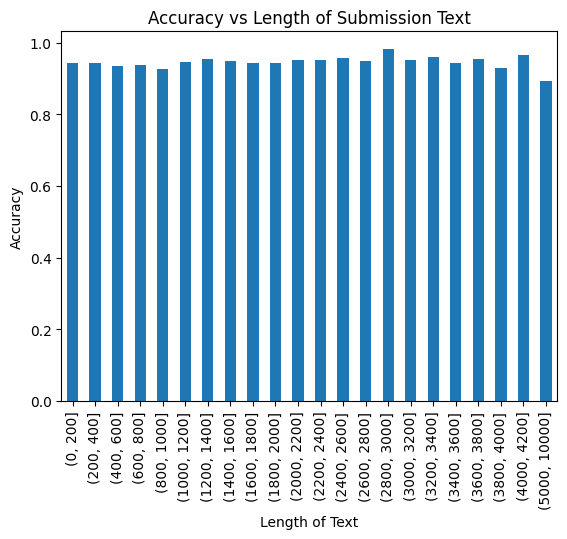

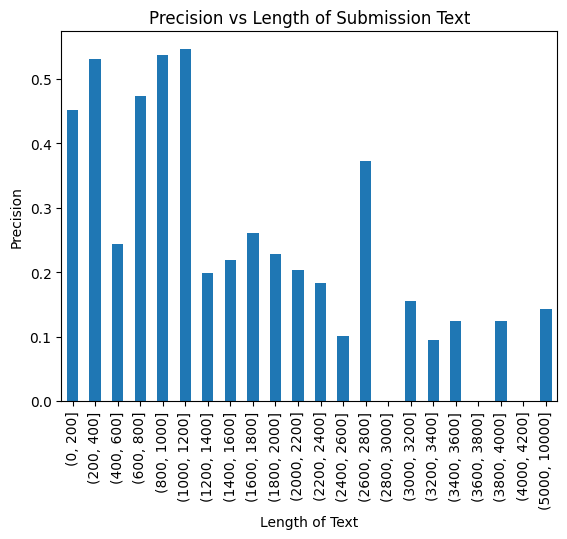

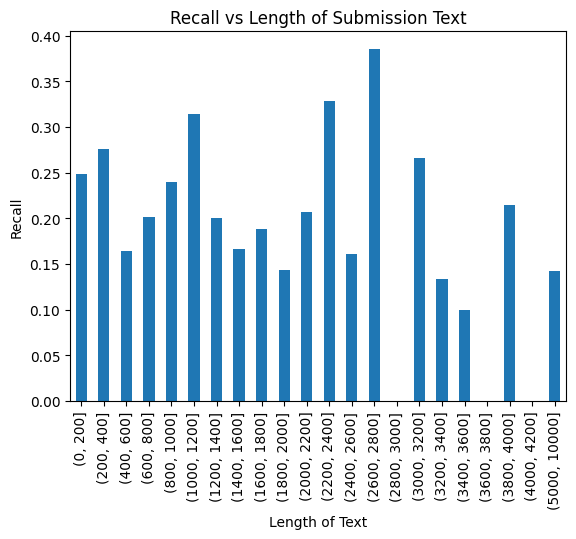

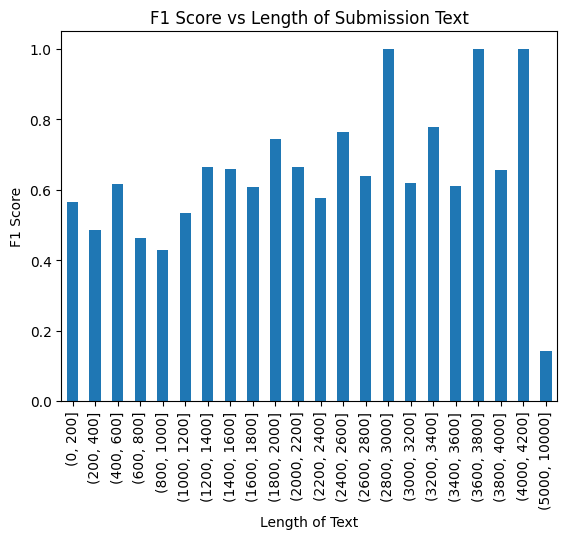

Performance of extraction of aspects from submission
Weighted Precision:  0.5608670198986335
Average Macro Precision:  0.5052783945994367
Weighted Recall:  0.18540953384250725
Average Macro Recall:  0.4128179993547905
Weighted F1 Score:  0.22241625552618627
Average Macro F1 Score:  0.42715020865273734
Weighted Accuracy:  0.7044000902968507
Average Macro Accuracy:  0.9439097744360901


In [64]:
macro_accuracy = process_annotated_data(labelled_submission, predicted_submission)
compute_micro_metrics(macro_accuracy,  "Performance of extraction of aspects from submission")
draw_performance(labelled_submission, "Submission")
macro_performance(macro_accuracy,  "Performance of extraction of aspects from submission")

C:\Users\yingq\AppData\Local\Temp\ipykernel_31096\3978936642.py:66: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9912280701754386' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Accuracy'] = accuracy
C:\Users\yingq\AppData\Local\Temp\ipykernel_31096\3978936642.py:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Precision'] = precision
C:\Users\yingq\AppData\Local\Temp\ipykernel_31096\3978936642.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Recall'] = recall


Performance of extraction of aspects from comments
True Positive:  1107
True Negative:  178200
False Positive:  2061
False Negative:  5478
micro accuracy:  0.9596512636074628
micro precision:  0.3494318181818182
micro recall:  0.16810933940774486
micro f1 score:  0.22700707474623197


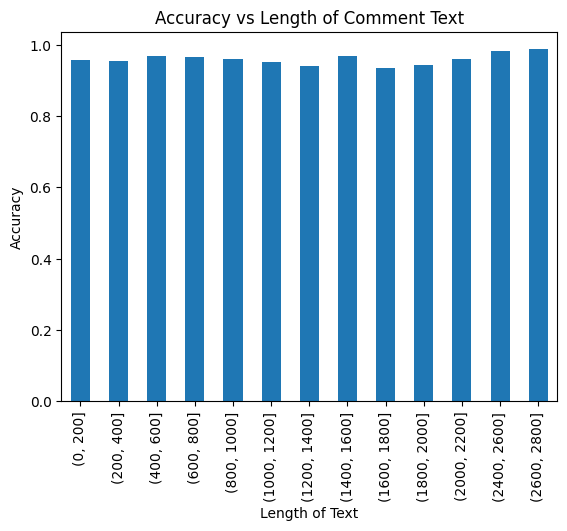

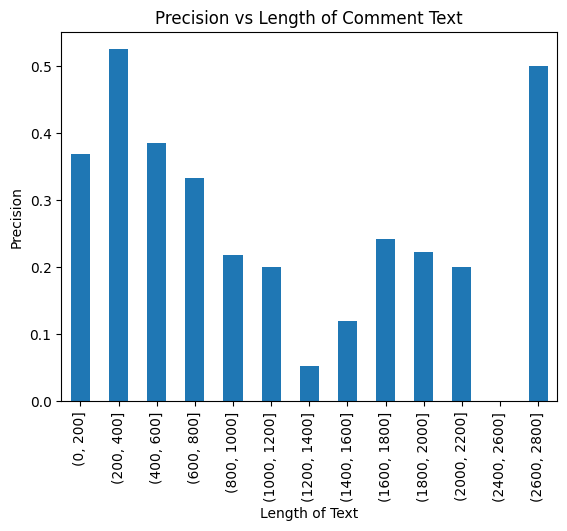

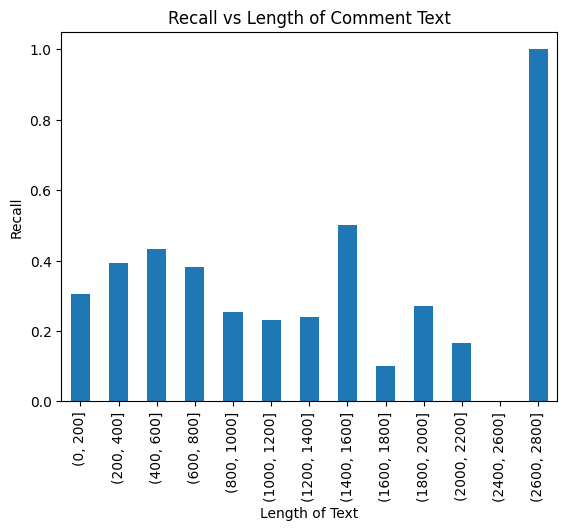

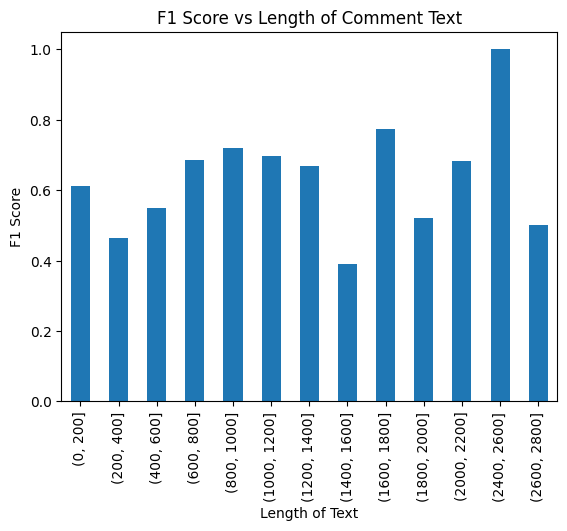

Performance of extraction of aspects from comments
Weighted Precision:  0.5143181489140678
Average Macro Precision:  0.4659022595722329
Weighted Recall:  0.16810933940774486
Average Macro Recall:  0.4950389317698707
Weighted F1 Score:  0.21970322388026312
Average Macro F1 Score:  0.41517488851247736
Weighted Accuracy:  0.7677971872954366
Average Macro Accuracy:  0.9596512636074621


In [65]:
macro_accuracy = process_annotated_data(labelled_comments, predicted_comments)
compute_micro_metrics(macro_accuracy, "Performance of extraction of aspects from comments")
draw_performance(labelled_comments, "Comment")
macro_performance(macro_accuracy, "Performance of extraction of aspects from comments")

In [73]:
def overlap_ratio(comments, submissions, title):
    total_overlapping = []
    for index, row in submissions.iterrows():
        
        overlap = set()
        row_id = row['id']
        predicted = row['aspects_converted']
        df = comments[comments['thread_id'] == row_id ]
        for index2, row2 in df.iterrows():
            for aspect in row2['aspects_converted']:
                if aspect in predicted:
                    overlap.add(aspect)
        if len(predicted) == 0:
            total_overlapping.append(1)
        else:
            total_overlapping.append(len(overlap)/len(predicted))
    
    plt.hist(total_overlapping, bins=20)
    plt.xlabel('Ratio of aspects in submission that are also in comments')
    plt.ylabel('Frequency')
    plt.title('Overlap Ratio Distribution for ' + title)
    return total_overlapping


In [67]:
labelled_comments['thread_id'] = 0
for index, row in labelled_comments.iterrows():
    id = row['id']
    thread_id = predicted_comments[predicted_comments['id'] == id]['thread_id'].to_list()[0]
    labelled_comments.at[index, 'thread_id'] = thread_id

C:\Users\yingq\AppData\Local\Temp\ipykernel_31096\1725062268.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15hb7n6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  labelled_comments.at[index, 'thread_id'] = thread_id


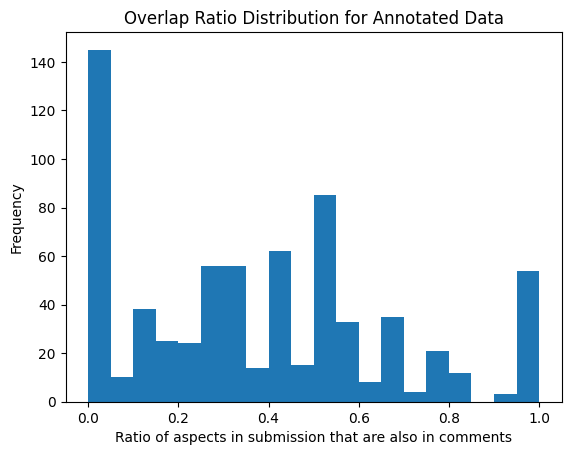

In [74]:
overlap_result = overlap_ratio(labelled_comments, labelled_submission, "Annotated Data")

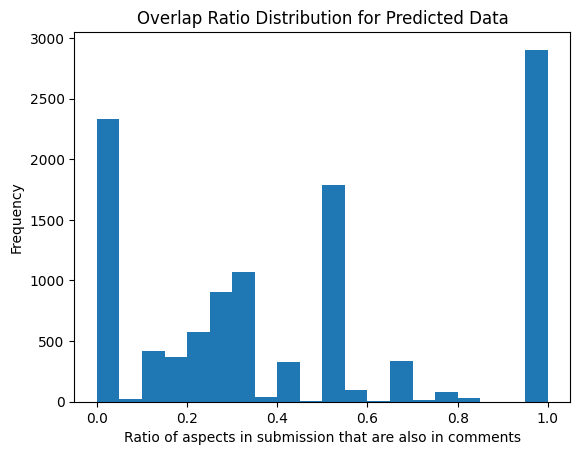

In [75]:
overlap_result = overlap_ratio(predicted_comments, predicted_submission, "Predicted Data")